In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('DoctorVisits-DA.csv')
df.head(15)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [ ]:
# Display the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
df["illness"].value_counts()

,count
illness,
1,1638
0,1554
2,946
3,542
4,274
5,236


In [ ]:
df["gender"].value_counts()

,count
gender,
female,2702
male,2488


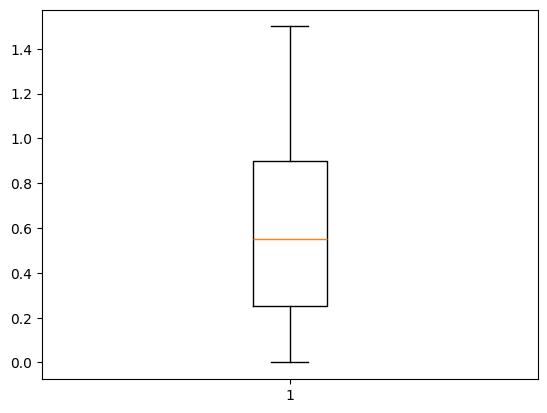

In [ ]:
y = list(df.income)
plt.boxplot(y)
plt.show()

In [ ]:
df.groupby('gender')['reduced'].mean()

,reduced
gender,
female,0.975574
male,0.738344


<Axes: >

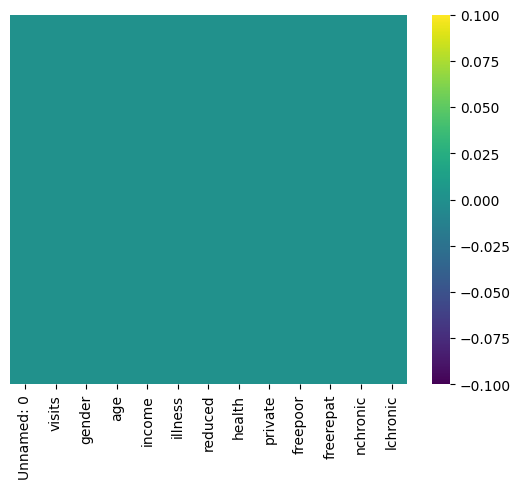

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<Axes: >

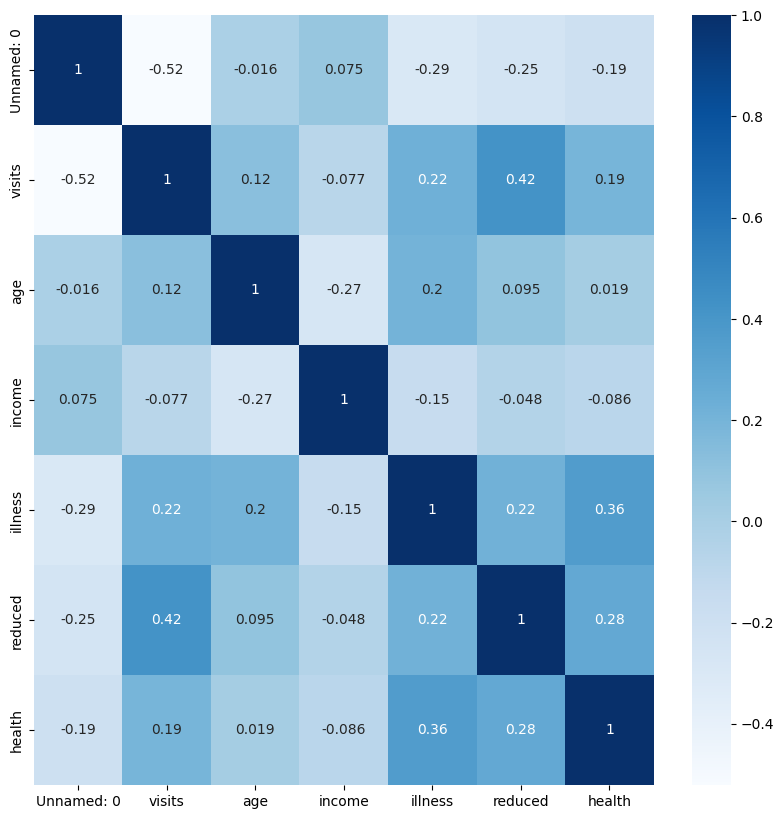

In [ ]:
plt.figure(figsize=(10, 10))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='Blues')

Text(0, 0.5, 'Number of Visits')

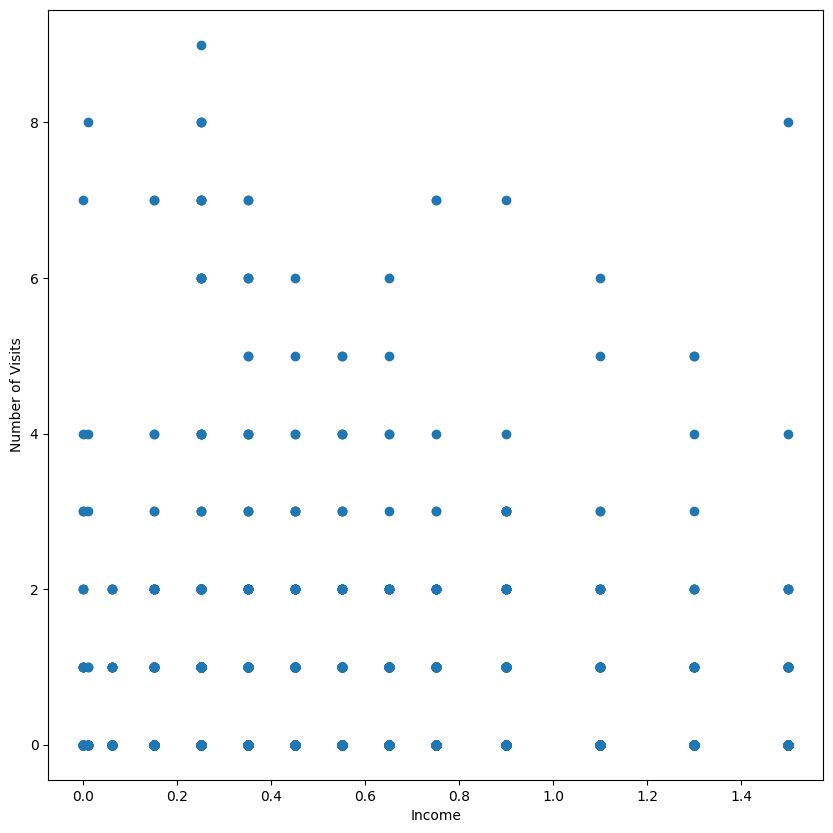

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(df['income'], df['visits'])
plt.xlabel('Income')
plt.ylabel('Number of Visits')

<Axes: xlabel='gender', ylabel='Count'>

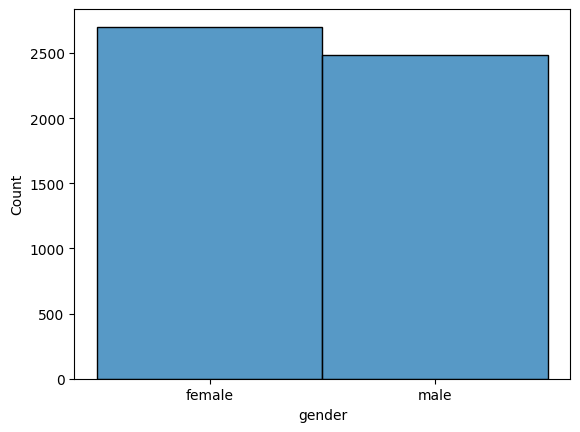

In [ ]:
sns.histplot(df.gender,bins=2)

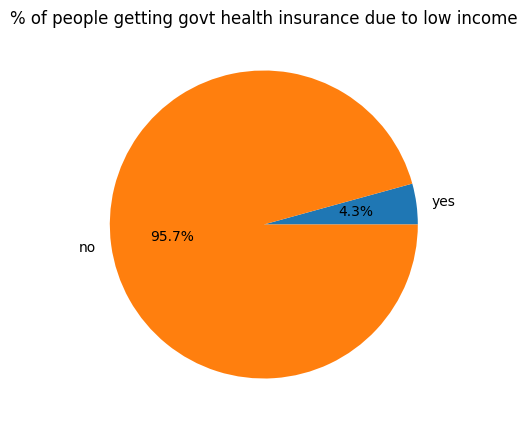

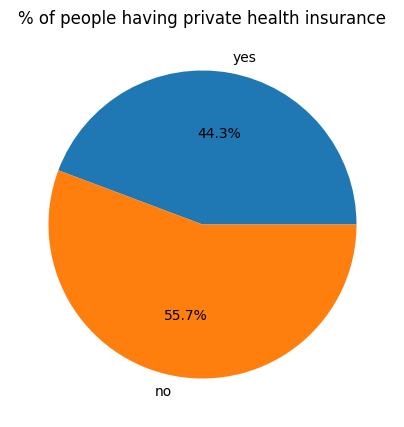

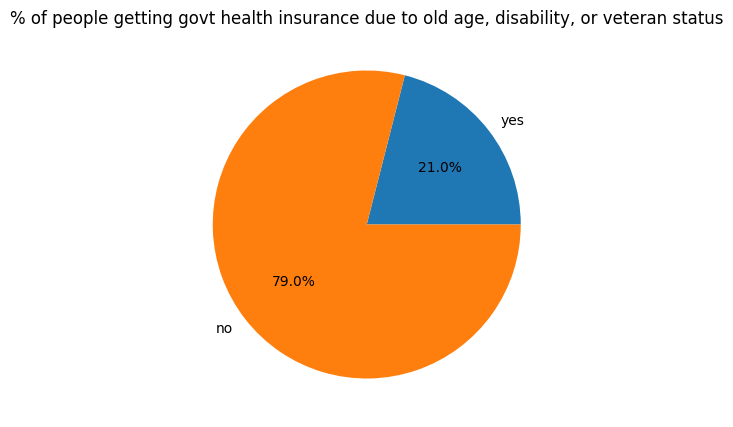

In [ ]:
# Data labels
labels = ['yes', 'no']

# % of people getting govt insurance due to low income
Y = df[df['freepoor'] == 'yes']
N = df[df['freepoor'] == 'no']
x = [Y.shape[0], N.shape[0]]

plt.figure(figsize=(5, 5))
plt.pie(x, labels=labels, autopct='%1.1f%%')
plt.title("% of people getting govt health insurance due to low income")
plt.show()

# % of people having private insurance
Y = df[df['private'] == 'yes']
N = df[df['private'] == 'no']
x = [Y.shape[0], N.shape[0]]

plt.figure(figsize=(5, 5))
plt.pie(x, labels=labels, autopct='%1.1f%%')
plt.title("% of people having private health insurance")
plt.show()

# % of people getting govt insurance due to old age, disability, or veteran status
Y = df[df['freerepat'] == 'yes']
N = df[df['freerepat'] == 'no']
x = [Y.shape[0], N.shape[0]]

plt.figure(figsize=(5, 5))
plt.pie(x, labels=labels, autopct='%1.1f%%')
plt.title("% of people getting govt health insurance due to old age, disability, or veteran status")
plt.show()

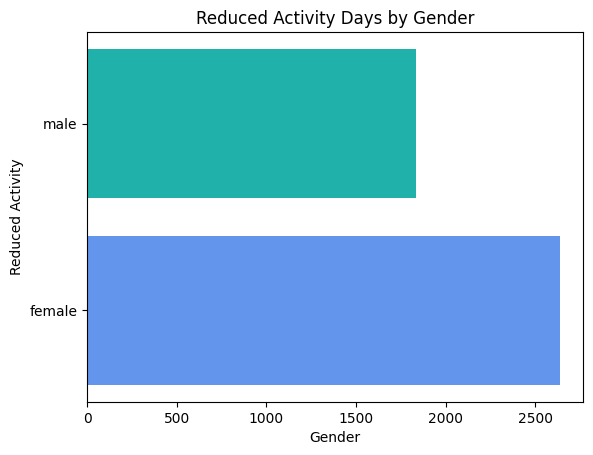

In [ ]:
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'], db['reduced'], color=['cornflowerblue', 'lightseagreen'])
plt.xlabel('Gender')
plt.ylabel('Reduced Activity')
plt.title('Reduced Activity Days by Gender')
plt.show()

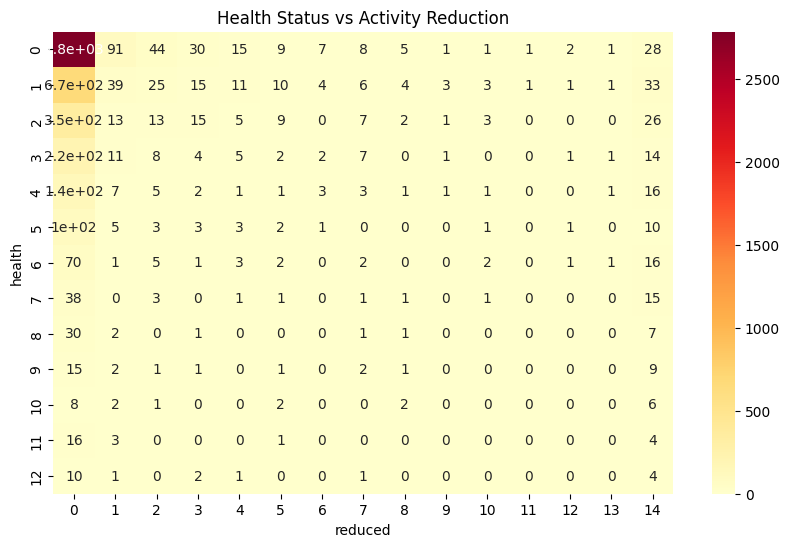

In [ ]:
health_reduced = pd.crosstab(df['health'], df['reduced'])
plt.figure(figsize=(10, 6))
sns.heatmap(health_reduced, annot=True, cmap='YlOrRd')
plt.title('Health Status vs Activity Reduction')
plt.show()